##Setup

In [1]:
%matplotlib inline

/usr/local/python-2.7.6/lib/python2.7/site-packages/matplotlib-1.5.1-py2.7-linux-x86_64.egg/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
from numpy import array
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/python-2.7.6/lib/python2.7/site-packages/matplotlib-1.5.1-py2.7-linux-x86_64.egg/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
import thunder
from showit import image, tile
import matplotlib.animation as animation

In [4]:
import json

In [5]:
from os.path import join, exists
from os import mkdir, makedirs

In [6]:
from numpy import save

In [7]:
from pandas import DataFrame

##Set directory and session information

In [8]:
directory = '/tier2/freeman/Nick/lfov.calibration'

In [25]:
key = '2016-04-24-6-vision'
name = 'anm-0330549'

In [26]:
path = join(directory, 'reprocessed', name, key)
print exists(path)

True


##Create savepath

In [27]:
savepath = join(path, 'traces')
if not exists(savepath):
    makedirs(savepath)

##Load data

In [28]:
data = thunder.images.frombinary(join(path, 'images'), engine=sc)

In [29]:
data.cache();

##Load sources

In [30]:
from regional import many

In [31]:
tmp = []
for i in range(7):
    with open(join(path, 'sources', 'sources-%04i.json' % i), 'r') as fid:
        tmp.append(json.load(fid))
regions = many(tmp)

In [32]:
regions

regions
count: 7

##Create extraction model

In [33]:
from extraction.model import ExtractionModel

In [34]:
sp = ExtractionModel(regions)

##Get and save raw fluorescent traces

In [35]:
traces = sp.transform(data)

In [36]:
traces.tobinary(join(savepath, 'raw'))

##Plot traces

In [37]:
raw = DataFrame(traces.toarray().T)

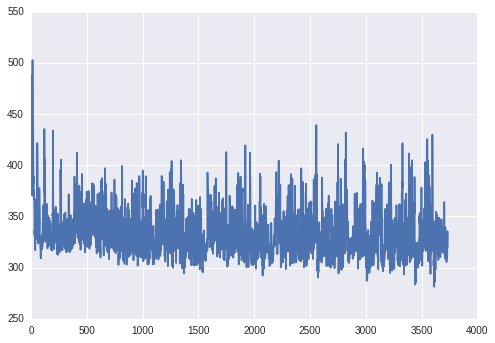

In [38]:
plt.plot(raw[0]);

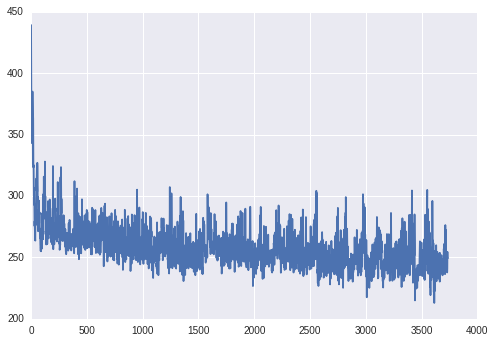

In [39]:
plt.plot(raw.mean(axis=1));